**Notebook by: Maria J. Molina (NCAR)**

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import staff_module as smodule

In [2]:
# ---- 

# ucar list
all_files = glob.glob("../data/staff_*.csv")
all_files = sorted(all_files)
df_ucar = smodule.open_and_concat(all_files)

# ---- 

# hsi list
all_files = glob.glob("../data/hsi_staff_*.csv")
all_files = sorted(all_files)
df_hsis = smodule.open_and_concat(all_files)

# ---- 

# ehi list
all_files = glob.glob("../data/emerginghsi_staff_*.csv")
all_files = sorted(all_files)
df_ehis = smodule.open_and_concat(all_files)

# ---- 

all_unis = pd.concat([df_ucar, df_hsis, df_ehis])

# ---- 

In [3]:
df = smodule.different_tracks(all_unis)

In [4]:
# --- # ---

df_T_hisptotal = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['Hispanic or Latino total']

df_T_hispperce = (df.loc[(df['Instructional staff category'] == 'tenured total')].groupby(
                    'year').sum()['Hispanic or Latino total'] / df.loc[(df['Instructional staff category'] == 'tenured total')].groupby(
                    'year').sum()['Grand total']) * 100

# ---

df_T_hispwomen_total = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['Hispanic or Latino women']

df_T_hispwomen_perce = (df.loc[(df['Instructional staff category'] == 'tenured total')].groupby(
                        'year').sum()['Hispanic or Latino women'] / df.loc[(df['Instructional staff category'] == 'tenured total')].groupby(
                        'year').sum()['Grand total women']) * 100

# ---

df_T_hispmen_total = df.loc[(df['Instructional staff category'] == 'tenured total')].groupby('year').sum()['Hispanic or Latino men']

df_T_hispmen_perce = (df.loc[(df['Instructional staff category'] == 'tenured total')].groupby(
                        'year').sum()['Hispanic or Latino men'] / df.loc[(df['Instructional staff category'] == 'tenured total')].groupby(
                        'year').sum()['Grand total men']) * 100

# --- # ---

In [5]:
# --- # ---

df_TT_hisptotal  = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['Hispanic or Latino total']

df_TT_hispperce = (df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby(
                    'year').sum()['Hispanic or Latino total'] / df.loc[(
                    df['Instructional staff category'] == 'on-tenure track total')].groupby(
                    'year').sum()['Grand total']) * 100

# ---

df_TT_hispwomen_total = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['Hispanic or Latino women']

df_TT_hispwomen_perce = (df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby(
                        'year').sum()['Hispanic or Latino women'] / df.loc[(
                        df['Instructional staff category'] == 'on-tenure track total')].groupby(
                        'year').sum()['Grand total women']) * 100

# ---

df_TT_hispmen_total = df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby('year').sum()['Hispanic or Latino men']

df_TT_hispmen_perce = (df.loc[(df['Instructional staff category'] == 'on-tenure track total')].groupby(
                        'year').sum()['Hispanic or Latino men'] / df.loc[(
                        df['Instructional staff category'] == 'on-tenure track total')].groupby(
                        'year').sum()['Grand total men']) * 100

# --- # ---

In [6]:
# ----# ----

df_noTT_hisptotal  = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino total']

df_noTT_hispperce  = (df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino total'] / df.loc[(
                        df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Grand total']) * 100

# ----

df_noTT_hispwomen_total = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino women']

df_noTT_hispwomen_perce  = (df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino women'] / df.loc[(
                        df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Grand total women']) * 100

# ----

df_noTT_hispmen_total = df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino men']

df_noTT_hispmen_perce  = (df.loc[(df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Hispanic or Latino men'] / df.loc[(
                        df['Instructional staff category'] == 'not on tenure track/no tenure system system total')].groupby(
                        'year').sum()['Grand total men']) * 100

# ---- # ---

In [7]:
hisptotal = pd.concat([df_T_hisptotal, df_TT_hisptotal, df_noTT_hisptotal], axis=1)
hispperce = pd.concat([df_T_hispperce, df_TT_hispperce, df_noTT_hispperce], axis=1)

hispwomen_total = pd.concat([df_T_hispwomen_total, df_TT_hispwomen_total, df_noTT_hispwomen_total], axis=1)
hispwomen_perce = pd.concat([df_T_hispwomen_perce, df_TT_hispwomen_perce, df_noTT_hispwomen_perce], axis=1)

hispmen_total = pd.concat([df_T_hispmen_total, df_TT_hispmen_total, df_noTT_hispmen_total], axis=1)
hispmen_perce = pd.concat([df_T_hispmen_perce, df_TT_hispmen_perce, df_noTT_hispmen_perce], axis=1)

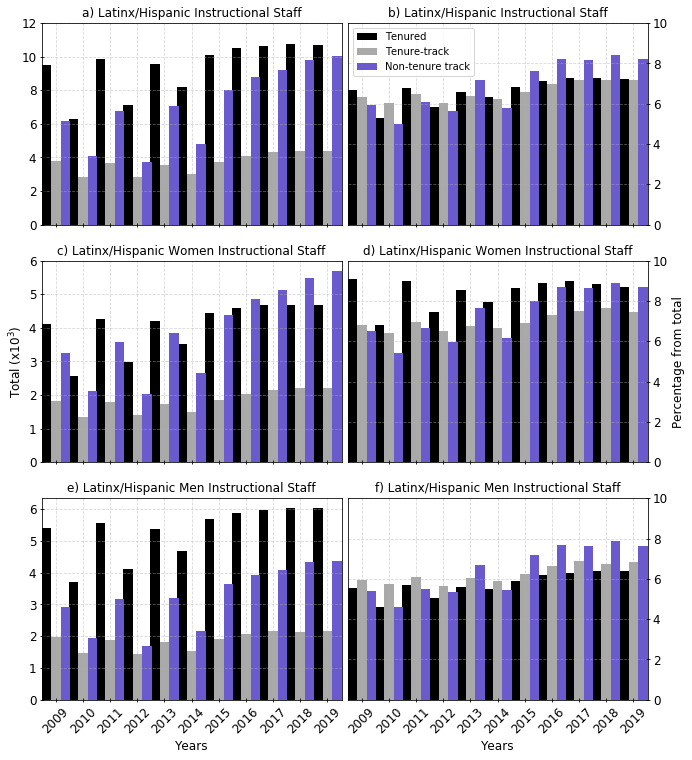

In [8]:
#-----------------------%

fig = plt.figure(figsize=(8.5,10.))

#-----------------------%

width = 0.35

#-----------------------%

ax1 = fig.add_axes([0., 0.66, 0.49, 0.28])
ax1.set_title('a) Latinx/Hispanic Instructional Staff',
              fontsize=12)

l1=ax1.bar(hisptotal.index.values + width, hisptotal.iloc[:,0].values, label='', width=width, color='k')
l2=ax1.bar(hisptotal.index.values + width + width, hisptotal.iloc[:,1].values, label='', width=width, color='darkgrey')
l3=ax1.bar(hisptotal.index.values + width + width + width, hisptotal.iloc[:,2].values, label='', width=width, color='slateblue')

ax1.margins(x=0)
ax1.grid(alpha=0.5,ls='--')

ax1.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True, top=False, left=True, right=False)

ax1.set_xticks([2009 + width + width,
                2010 + width + width,
                2011 + width + width,
                2012 + width + width,
                2013 + width + width,
                2014 + width + width,
                2015 + width + width,
                2016 + width + width,
                2017 + width + width,
                2018 + width + width,
                2019 + width + width])

ax1.set_yticks([0,2000,4000,6000,8000,10000,12000])
ax1.set_yticklabels([0,2,4,6,8,10,12],fontsize=12)

#-----------------------%

ax2 = fig.add_axes([0.5, 0.66, 0.49, 0.28])
ax2.set_title('b) Latinx/Hispanic Instructional Staff',
              fontsize=12)

ax2.bar(hispperce.index.values + width, hispperce.iloc[:,0].values, label='', width=width, color='k')
ax2.bar(hispperce.index.values + width + width, hispperce.iloc[:,1].values, label='', width=width, color='darkgrey')
ax2.bar(hispperce.index.values + width + width + width, hispperce.iloc[:,2].values, label='', width=width, color='slateblue')

ax2.legend([l1,l2,l3,],['Tenured', 'Tenure-track', 'Non-tenure track'],loc='upper left', ncol=1)

ax2.margins(x=0)
ax2.grid(alpha=0.5,ls='--')

ax2.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=False, labelright=True,
                bottom=True, top=False, left=False, right=True)

ax2.set_xticks([2009 + width + width,
                2010 + width + width,
                2011 + width + width,
                2012 + width + width,
                2013 + width + width,
                2014 + width + width,
                2015 + width + width,
                2016 + width + width,
                2017 + width + width,
                2018 + width + width,
                2019 + width + width])

ax2.set_yticks([0,2,4,6,8,10])
ax2.set_yticklabels([0,2,4,6,8,10],fontsize=12)

#-----------------------%

ax3 = fig.add_axes([0., 0.33, 0.49, 0.28])
ax3.set_title('c) Latinx/Hispanic Women Instructional Staff',
              fontsize=12)

ax3.bar(hispwomen_total.index.values + width, hispwomen_total.iloc[:,0].values, label='', width=width, color='k')
ax3.bar(hispwomen_total.index.values + width + width, hispwomen_total.iloc[:,1].values, label='', width=width, color='darkgrey')
ax3.bar(hispwomen_total.index.values + width + width + width, hispwomen_total.iloc[:,2].values, label='', width=width, color='slateblue')

ax3.margins(x=0)
ax3.grid(alpha=0.5,ls='--')

ax3.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=True, labelright=False,
                bottom=True, top=False, left=True, right=False)

ax3.set_xticks([2009 + width + width,
                2010 + width + width,
                2011 + width + width,
                2012 + width + width,
                2013 + width + width,
                2014 + width + width,
                2015 + width + width,
                2016 + width + width,
                2017 + width + width,
                2018 + width + width,
                2019 + width + width])

ax3.set_yticks([0,1000,2000,3000,4000,5000,6000])
ax3.set_yticklabels([0,1,2,3,4,5,6],fontsize=12)

ax3.set_ylabel(r"Total (x10$^{3}$)",fontsize=12)

#-----------------------%

ax4 = fig.add_axes([0.5, 0.33, 0.49, 0.28])
ax4.set_title('d) Latinx/Hispanic Women Instructional Staff',
              fontsize=12)

ax4.bar(hispwomen_perce.index.values + width, hispwomen_perce.iloc[:,0].values, label='', width=width, color='k')
ax4.bar(hispwomen_perce.index.values + width + width, hispwomen_perce.iloc[:,1].values, label='', width=width, color='darkgrey')
ax4.bar(hispwomen_perce.index.values + width + width + width, hispwomen_perce.iloc[:,2].values, label='', width=width, color='slateblue')

ax4.margins(x=0)
ax4.grid(alpha=0.5,ls='--')

ax4.tick_params(axis='both',direction='inout',
                labelbottom=False, labeltop=False, labelleft=False, labelright=True,
                bottom=True, top=False, left=False, right=True)

ax4.set_xticks([2009 + width + width,
                2010 + width + width,
                2011 + width + width,
                2012 + width + width,
                2013 + width + width,
                2014 + width + width,
                2015 + width + width,
                2016 + width + width,
                2017 + width + width,
                2018 + width + width,
                2019 + width + width])

ax4.set_yticks([0,2,4,6,8,10])
ax4.set_yticklabels([0,2,4,6,8,10],fontsize=12)

ax4.set_ylabel('Percentage from total',fontsize=12)
ax4.yaxis.set_label_position("right")

#-----------------------%

ax5 = fig.add_axes([0., 0., 0.49, 0.28])
ax5.set_title('e) Latinx/Hispanic Men Instructional Staff',
              fontsize=12)

ax5.bar(hispmen_total.index.values + width, hispmen_total.iloc[:,0].values, label='', width=width, color='k')
ax5.bar(hispmen_total.index.values + width + width, hispmen_total.iloc[:,1].values, label='', width=width, color='darkgrey')
ax5.bar(hispmen_total.index.values + width + width + width, hispmen_total.iloc[:,2].values, label='', width=width, color='slateblue')

ax5.margins(x=0)
ax5.grid(alpha=0.5,ls='--')
ax5.set_xlabel('Years', fontsize=12)

ax5.tick_params(axis='both',direction='inout',
                labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                bottom=True, top=False, left=True, right=False)

ax5.set_xticks([2009 + width + width,
                2010 + width + width,
                2011 + width + width,
                2012 + width + width,
                2013 + width + width,
                2014 + width + width,
                2015 + width + width,
                2016 + width + width,
                2017 + width + width,
                2018 + width + width,
                2019 + width + width])
ax5.set_xticklabels([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],fontsize=12,rotation=45)

ax5.set_yticks([0,1000,2000,3000,4000,5000,6000])
ax5.set_yticklabels([0,1,2,3,4,5,6],fontsize=12)

#-----------------------%

ax6 = fig.add_axes([0.5, 0., 0.49, 0.28])
ax6.set_title('f) Latinx/Hispanic Men Instructional Staff',
              fontsize=12)

ax6.bar(hispmen_perce.index.values + width, hispmen_perce.iloc[:,0].values, label='', width=width, color='k')
ax6.bar(hispmen_perce.index.values + width + width, hispmen_perce.iloc[:,1].values, label='', width=width, color='darkgrey')
ax6.bar(hispmen_perce.index.values + width + width + width, hispmen_perce.iloc[:,2].values, label='', width=width, color='slateblue')

ax6.margins(x=0)
ax6.grid(alpha=0.5,ls='--')
ax6.set_xlabel('Years', fontsize=12)

ax6.tick_params(axis='both',direction='inout',
                labelbottom=True, labeltop=False, labelleft=False, labelright=True,
                bottom=True, top=False, left=False, right=True)

ax6.set_xticks([2009 + width + width,
                2010 + width + width,
                2011 + width + width,
                2012 + width + width,
                2013 + width + width,
                2014 + width + width,
                2015 + width + width,
                2016 + width + width,
                2017 + width + width,
                2018 + width + width,
                2019 + width + width])
ax6.set_xticklabels([2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],fontsize=12,rotation=45)

ax6.set_yticks([0,2,4,6,8,10])
ax6.set_yticklabels([0,2,4,6,8,10],fontsize=12)

#-----------------------%

plt.savefig(f"../figures/fig6.png", bbox_inches='tight', dpi=500)
plt.show()

#-----------------------%